# Problem Statment 1: Delivery_time -> Predict delivery time using sorting time 

==============Steps to follow==============
EDA and data visualization
Correlation Analysis
Model Building
Model Testing
Model Prediction

============EDA(Data-Analysis/Cleaning) and data visualization================

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as sts
import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler

In [325]:
delivtime_df = pd.read_csv('/Users/Akshay/Documents/DataScience/ExcelR/Assignments/DataScience/SimpleLinearRegression/delivery_time.csv')
delivtime_df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [326]:
delivtime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [327]:
delivtime_df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [328]:
type(delivtime_df)

pandas.core.frame.DataFrame

In [329]:
delivtime_df = delivtime_df.rename({'Delivery Time': 'Delivery_Time','Sorting Time':'Sorting_Time'}, axis=1)
delivtime_df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [330]:
delivtime_df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [331]:
delivtime_df.median()

Delivery_Time    17.83
Sorting_Time      6.00
dtype: float64

In [332]:
delivtime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


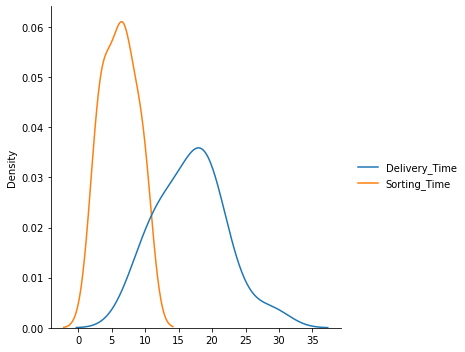

In [333]:
sns.displot(delivtime_df,kind='kde')# the data is nearly normally distributed so no need for transformation as mean and mode is nearly equal 

In [334]:
delivtime_df[delivtime_df.duplicated()]

,Delivery_Time,Sorting_Time


C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


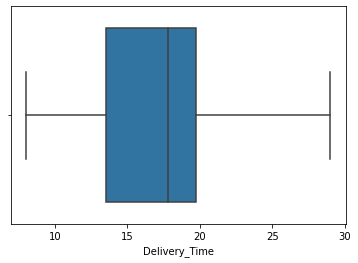

C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sorting_Time'>

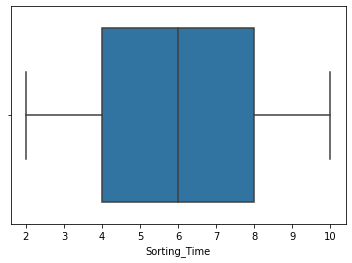

In [335]:
#Finding outliers by visualization using box plot
sns.boxplot(delivtime_df['Delivery_Time'])
plt.show()
sns.boxplot(delivtime_df['Sorting_Time'])


In [336]:
#Finding excat value of outliers
Q1 = delivtime_df.quantile(.25)
Q2 = delivtime_df.quantile(.75)
IQR = Q2-Q1
UE = Q2 + (1.5*IQR)
LE = Q1 - (1.5*IQR)
for value in delivtime_df.columns:
    print(delivtime_df[value][(delivtime_df[value] < LE[value]) | (delivtime_df[value] > UE[value])])

Series([], Name: Delivery_Time, dtype: float64)
Series([], Name: Sorting_Time, dtype: int64)


In [337]:
#Finding missing value by formula
delivtime_df[delivtime_df.isnull().any(axis=1)]

,Delivery_Time,Sorting_Time


<AxesSubplot:>

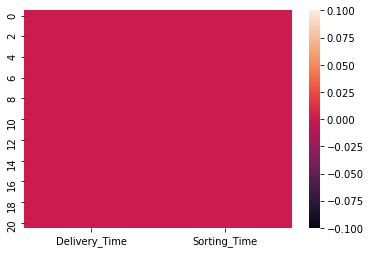

In [338]:
#Finding missing value by visualization
col = delivtime_df.columns
sns.heatmap(delivtime_df[col].isnull())# No misisng value

In [339]:
report = pp.ProfileReport(delivtime_df)
report.to_widgets()

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

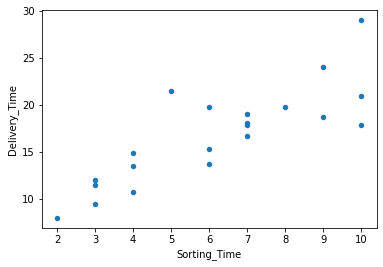

In [340]:
delivtime_df.plot(y='Delivery_Time',x = 'Sorting_Time',kind='scatter')
#positive linear association

=================Correlation Analysis===================

In [341]:
delivtime_df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<AxesSubplot:>

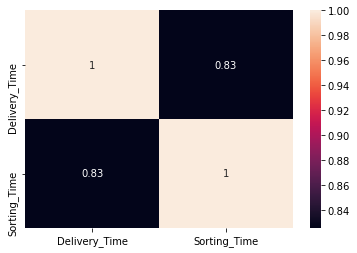

In [342]:
sns.heatmap(delivtime_df.corr(),annot=True)

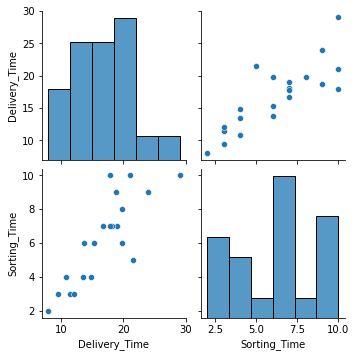

In [343]:
sns.pairplot(delivtime_df)#positive linear association i.e as x increase y increse

====================Model Building and Testing=====================

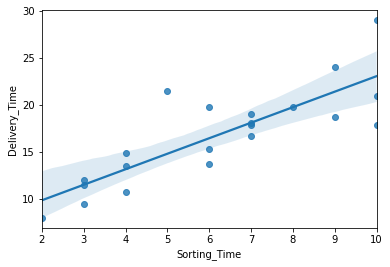

In [344]:
sns.regplot(x="Sorting_Time", y="Delivery_Time", data=delivtime_df);

In [345]:
model = smf.ols("Delivery_Time~Sorting_Time",delivtime_df).fit()#y=Delivery_Time,x=Sorting_Time
model

In [346]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           3.98e-06
Time:                        11:58:18   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [347]:
dir(model)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initia

In [348]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [349]:
model.rsquared #since r2 is 0.6 model built is 68% accurate with the predicted value

0.6822714748417231

In [350]:
model.pvalues# the p value is less than 0.05 so it is significant i.e weightage of sortingTime is important and useful for prdicting delivery time

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64

======================Model Prediction==================

In [351]:
#for Delivery_Time = 10
array = pd.Series([10])
df = pd.DataFrame(array,columns=['Sorting_Time'])
model.predict(df)

0    23.072933
dtype: float64

# Problem Statment 2: Salary_hike -> Build a prediction model for Salary_hike 

============EDA(Data-Analysis/Cleaning) and data visualization================

In [352]:
salary_df = pd.read_csv('/Users/Akshay/Documents/DataScience/ExcelR/Assignments/DataScience/SimpleLinearRegression/Salary_Data.csv')
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [353]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [354]:
salary_df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [355]:
type(salary_df)

pandas.core.frame.DataFrame

In [356]:
salary_df[salary_df.isnull().any(axis=1)]#no null value

,YearsExperience,Salary


In [357]:
salary_df = salary_df.rename({'YearsExperience': 'YearsOfExperience'},axis=1)
salary_df.head()

,YearsOfExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [358]:
salary_df.describe()

,YearsOfExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [359]:
salary_df.median()

YearsOfExperience        4.7
Salary               65237.0
dtype: float64

In [360]:
salary_df[salary_df.duplicated()]

,YearsOfExperience,Salary


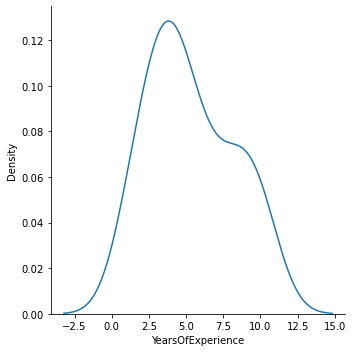

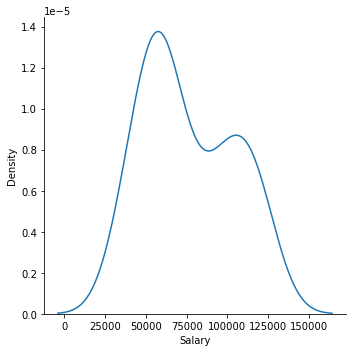

In [361]:
sns.displot(salary_df['YearsOfExperience'],kind='kde')
sns.displot(salary_df['Salary'],kind='kde')
#from the graph we can see that the data is not normally distributed and also from mean and mode are not equally

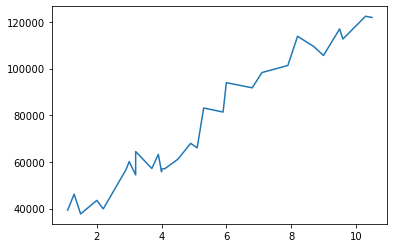

In [362]:
plt.plot('YearsOfExperience','Salary', data = salary_df)

<AxesSubplot:>

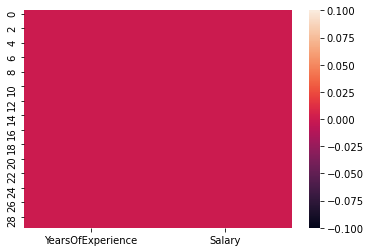

In [363]:
#Finding missing value by visualization
col = salary_df.columns
sns.heatmap(salary_df[col].isnull())

C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


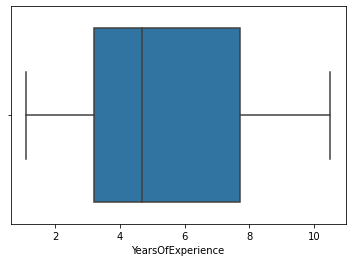

C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

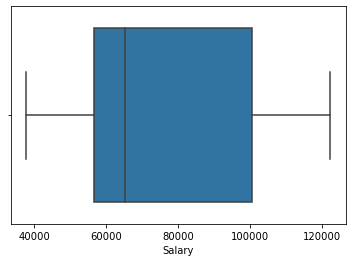

In [364]:
#Finding outlier

sns.boxplot(salary_df['YearsOfExperience'])
plt.show()
sns.boxplot(salary_df['Salary'])
#no outliers

In [365]:
#as the data has diffrent scaling unit we apply standardization to get std normally distributed data
#Calling class and fit algo
array = salary_df.values
ar1  =salary_df['Salary'].values.reshape(-1,1)
scalar = StandardScaler().fit(array)
scalar_y = StandardScaler().fit(ar1)
#calling transform algo
rescaled = scalar.transform(array)
np.set_printoptions(precision=2)
rescaled[:5,:]


array([[-1.51, -1.36],
       [-1.44, -1.11],
       [-1.37, -1.42],
       [-1.19, -1.2 ],
       [-1.12, -1.34]])

In [366]:
new_salary_df=pd.DataFrame(rescaled,columns = ['YearsOfExperience','Salary'])
new_salary_df.head()
new_salary_df.info()
new_salary_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YearsOfExperience  30 non-null     float64
 1   Salary             30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Index(['YearsOfExperience', 'Salary'], dtype='object')

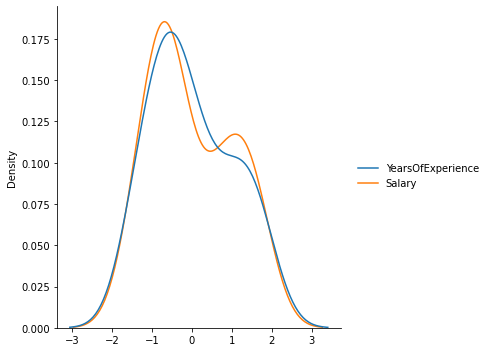

In [367]:
sns.displot(new_salary_df,kind='kde')

In [368]:
report = pp.ProfileReport(new_salary_df)
report.to_widgets()

===================Correlation Analysis======================

<AxesSubplot:xlabel='YearsOfExperience', ylabel='Salary'>

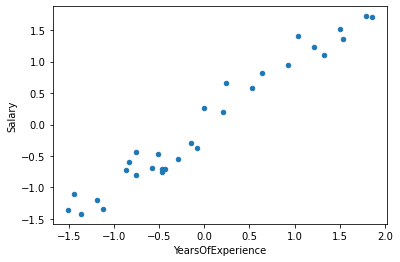

In [369]:
#scatter plot
new_salary_df.plot(kind='scatter',x='YearsOfExperience',y='Salary')


In [370]:
new_salary_df.corr()

,YearsOfExperience,Salary
YearsOfExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

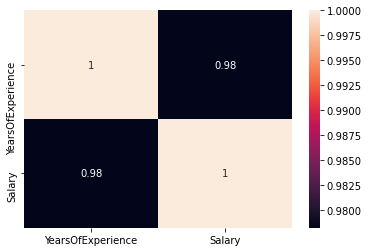

In [371]:
sns.heatmap(new_salary_df.corr(),annot=True)

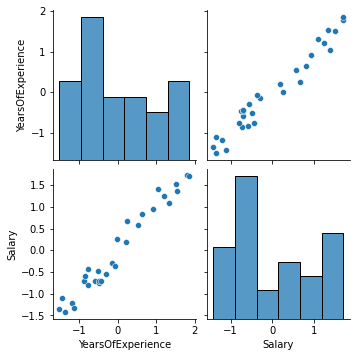

In [372]:
sns.pairplot(new_salary_df)

=====================Model Building and Testing=====================

<AxesSubplot:xlabel='YearsOfExperience', ylabel='Salary'>

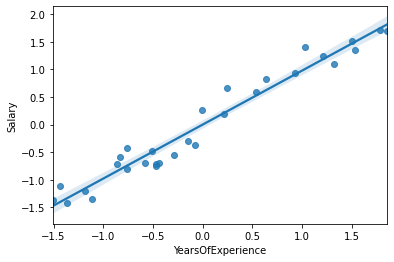

In [373]:
sns.regplot(x='YearsOfExperience',y='Salary',data=new_salary_df)

In [374]:
model = smf.ols('Salary~YearsOfExperience',data = new_salary_df).fit()
model

In [375]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           1.14e-20
Time:                        11:58:43   Log-Likelihood:                 4.6151
No. Observations:                  30   AIC:                            -5.230
Df Residuals:                      28   BIC:                            -2.428
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6.939e-18      0.039  -1.77e-16      1.000      -0.080       0.080
YearsOfExperience     0.9782      0.039     24.950      0.000       0.898       1.059
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [376]:
model.params

Intercept           -6.938894e-18
YearsOfExperience    9.782416e-01
dtype: float64

In [377]:
print(model.pvalues,'\n\n',model.tvalues)#the p value is less than 0.05 so it is significant i.e weightage of YrOfExp is important and useful for prdicting Salary

Intercept            1.000000e+00
YearsOfExperience    1.143068e-20
dtype: float64 

 Intercept           -1.769768e-16
YearsOfExperience    2.495009e+01
dtype: float64


In [378]:
model.rsquared# 95% of accurancy for the coefficint determination for the model built that it predicts response varibale with 95% accuracy

0.9569566641435086

====================Model Prediction========================

In [379]:
new_array = pd.Series([20])
df = pd.DataFrame(new_array,columns=['YearsOfExperience'])
predictSal = model.predict(df)
predictSal

0    19.564832
dtype: float64

In [380]:
#yoeList = salary_df.YearsOfExperience
predSalList = model.predict(new_salary_df)
scaledBackSalary = scalar_y.inverse_transform(predSalList)
actualSalList = salary_df.Salary
salList = {'Actual_Sal':actualSalList,'Predicted_Sal':scaledBackSalary}
salComp = pd.DataFrame(salList)
salComp


,Actual_Sal,Predicted_Sal
0,39343.0,36187.158752
1,46205.0,38077.151217
2,37731.0,39967.143681
3,43525.0,44692.124842
4,39891.0,46582.117306
5,56642.0,53197.090931
6,60150.0,54142.087163
7,54445.0,56032.079627
8,64445.0,56032.079627
9,57189.0,60757.060788
